In this notebook, we're going to talk about the importance of time-series data and why we need to special tools to work with it.

# Important: Run this code cell each time you start a new session!

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
!wget -Ncnp https://physionet.org/files/accelerometry-walk-climb-drive/1.0.0/raw_accelerometry_data/id00b70b13.csv

--2024-06-12 23:09:18--  https://physionet.org/files/accelerometry-walk-climb-drive/1.0.0/raw_accelerometry_data/id00b70b13.csv
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25931775 (25M) [text/plain]
Saving to: ‘id00b70b13.csv’

id00b70b13.csv      100%[===================>]  24.73M   562KB/s    in 45s     

2024-06-12 23:10:04 (560 KB/s) - ‘id00b70b13.csv’ saved [25931775/25931775]



In [3]:
df = pd.read_csv('id00b70b13.csv')

# Filter to only walking activity, which is given a code of 1
df = df[df['activity'] == 1]

# Process the time
df.rename(columns={'time_s': 'Time'}, inplace=True)
df = df[(df['Time']>=700) & (df['Time']<=710)]
df['Time'] = df['Time'] - df['Time'].min()

# Process the accel
df['Accel'] = np.sqrt(df['la_x']**2 + df['la_y']**2 + df['la_z']**2)*9.8

# Keep only crucial columns
keep_cols = ['Time', 'Accel']
df = df[keep_cols]
df.to_csv('walking.csv',index=False)

# What Is Time-Series Data?

Time-series data is a type of data where measurements or observations are recorded over time. Ideally, this data is collected at a regular interval (e.g., every minute, hour, or day), but time-series data can describe the occurrence of sporadic events.

Time-series data can be used to represent phenomena ranging from physiological signals to public health trends. For example, electrocardiogram (ECG) readings provide time-series data of heart activity and can be used to detect irregular heartbeats. Blood glucose levels in diabetic patients can also be monitored over time to manage their treatment regimen and prevent complications. Moreover, time-series data for diseases like COVID-19 can be used to forecast disease spread and predict outbreaks.

Time-series data is essentially a special form of tabular data that has two columns: one corresponding to time and another corresponding to the measurement value. Note that with `pandas`, we could technically store time-series data in a `Series` with time as an index; however, we will generally stick with `DataFrames` for the sake of making it clear how the data is being manipulated.

Let's take a look at a time-varying signal showing the values reported by a motion sensor mounted on someone's ankle while they were walking:

In [4]:
df = pd.read_csv('walking.csv')
df.head(10) # df.iloc[:10]

,Time,Accel
0,0.00,10.300098
1,0.01,10.340338
2,0.02,10.302858
3,0.03,10.185373
4,0.04,10.418875
5,0.05,9.997921
6,0.06,10.396738
7,0.07,10.681087
8,0.08,11.111100
9,0.09,12.580975


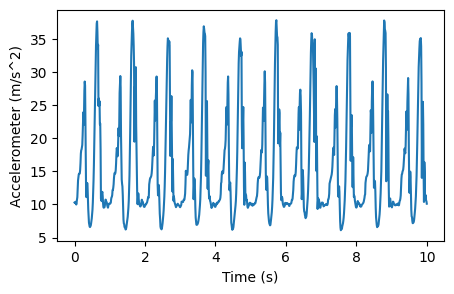

In [5]:
plt.figure(figsize=(5,3))
plt.plot(df['Time'], df['Accel'])
plt.xlabel('Time (s)')
plt.ylabel('Accelerometer (m/s^2)')
plt.show()

With tabular data, rows are typically used to represent independent observations or instances of data, and columns are typically used to represent distinct characteristics of those instances. Time-series data, on the other hand, describes a chronological sequences of information, so the rows and columns specifically structured for that purpose.

# Why Do We Need Something Fancy?

The signal we just visualized is not all too different from the data that is collected by fitness trackers like Fitbits or Apple Watches. One of the most common algorithms used in most fitness trackers involves trying to find peaks in the data, as that is one of the most straightforward ways to count steps.

Conceptually, we are looking for really large values along the y-axis of our graph. Using what we know about operations on `pandas` data structures, this is one way to find a really large value in the sequence:

In [6]:
# Find the maximum point along with its timestamp
max_val_idx = df['Accel'].argmax()
max_val_time = df['Time'].iloc[max_val_idx]
max_val = df['Accel'].iloc[max_val_idx]

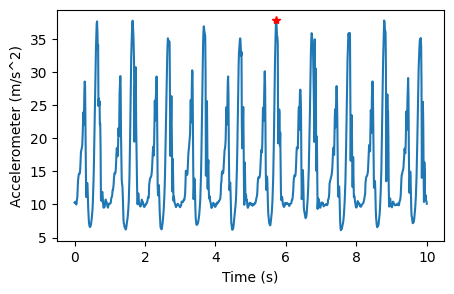

In [7]:
plt.figure(figsize=(5,3))
plt.plot(df['Time'], df['Accel'])
plt.plot(max_val_time, max_val, 'r*')
plt.xlabel('Time (s)')
plt.ylabel('Accelerometer (m/s^2)')
plt.show()

However, this only gets use the location of the *highest peak*. How would we get other ones? We could come up with multiple variations of this approach (e.g., find the highest $N$ points, find all points above a threshold), but all of these variations have their own problems.

The real issue is that we are processing all of the time-series data at once — taking a lot of rich information and distilling it into a couple of numbers. What we really need is an approach that will allow us to process a little bit of time-series data at a time and then combine that information later.

# Summary

Over the next two sessions, we will cover some basic concepts in digital signal processing (DSP) that will help us manipulate and summarize time-series data.